# The effect of tax exemptions for dependents on fertility rates, _a distributed lag model_

In [1]:
# dataset publicly available here: http://fmwww.bc.edu/ec-p/data/wooldridge/fertil3.dta

import os
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

fertil3_data=os.path.join(os.getcwd(),"FERTIL3.dta")
df = pd.read_stata(fertil3_data)

In [2]:
df

,gfr,pe,year,t,tsq,pe_1,pe_2,pe_3,pe_4,pill,...,cpe_1,cpe_2,cpe_3,cpe_4,gfr_1,cgfr_1,cgfr_2,cgfr_3,cgfr_4,gfr_2
0,124.699997,0.000000,1913,1,1,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126.599998,0.000000,1914,2,4,0.000000,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,124.699997,NaN,NaN,NaN,NaN,NaN
2,125.000000,0.000000,1915,3,9,0.000000,0.000000,NaN,NaN,0,...,0.000000,NaN,NaN,NaN,126.599998,1.900002,NaN,NaN,NaN,124.699997
3,123.400002,0.000000,1916,4,16,0.000000,0.000000,0.000000,NaN,0,...,0.000000,0.000000,NaN,NaN,125.000000,-1.599998,1.900002,NaN,NaN,126.599998
4,121.000000,19.270000,1917,5,25,0.000000,0.000000,0.000000,0.000000,0,...,0.000000,0.000000,0.000000,NaN,123.400002,-1.599998,-1.599998,1.900002,NaN,125.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,68.400002,123.169998,1980,68,4624,132.929993,118.980003,116.110001,120.080002,1,...,13.949989,2.870003,-3.970001,-2.279999,67.199997,1.699997,-1.300003,1.000000,-0.199997,65.500000
68,67.400002,119.309998,1981,69,4761,123.169998,132.929993,118.980003,116.110001,1,...,-9.759995,13.949989,2.870003,-3.970001,68.400002,1.200005,1.699997,-1.300003,1.000000,67.199997
69,67.300003,102.040001,1982,70,4900,119.309998,123.169998,132.929993,118.980003,1,...,-3.860001,-9.759995,13.949989,2.870003,67.400002,-1.000000,1.200005,1.699997,-1.300003,68.400002
70,65.800003,92.489998,1983,71,5041,102.040001,119.309998,123.169998,132.929993,1,...,-17.269997,-3.860001,-9.759995,13.949989,67.300003,-0.099998,-1.000000,1.200005,1.699997,67.400002


#### Graphing TAX EXEMPTION (pe) and FERTILITY RATE (gfr) variables over time confirms that both contain a time trend.

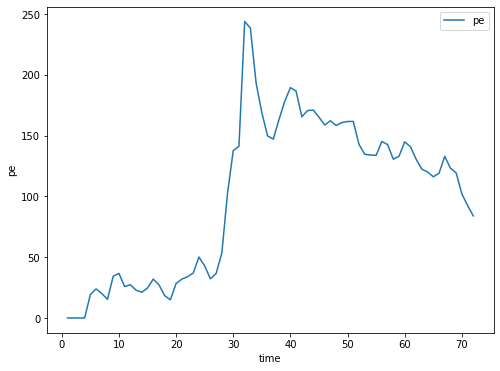

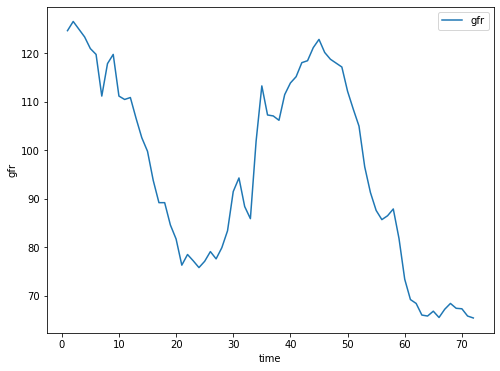

In [3]:
def check_time_trend(var):
    #regress = smf.ols(var + ' ~ t', data=df, subset=None).fit()
    x = df['t'] 
    y = df[var]
    # plot
    fig, ax = plt.subplots(figsize=(8,6))
    plt.ylabel(var)
    plt.xlabel('time')
    ax.plot(x, y, '-', label=var)
    ax.legend(loc='best')

check_time_trend('pe')
check_time_trend('gfr')

#### Then regression equation of $\hat{gfr_t}$ on a quadratic in time gives: 
#### $\hat{gfr_t}=107.0563+0.0717t-0.0080{t^2}$ 

#### The OLS regression parameter statistics show that $t$ and $t^{2}$ are individually insignificant, since both parameter p-values are well above 0.05. (The individual insignificance is due to the correlation among pe and its lagged values).

In [4]:
results = smf.ols('gfr ~ t + tsq', data=df, subset=None).fit()
resid = results.resid
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gfr   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     15.80
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           2.24e-06
Time:                        17:15:18   Log-Likelihood:                -303.07
No. Observations:                  72   AIC:                             612.1
Df Residuals:                      69   BIC:                             619.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    107.0563      6.050     17.696      0.0

<br>

#### However, the F-test reveals that jointly, they are very significant (p ≈ 0.00000224).<br> This significance confirms the non-linear trending behavior of $gfr$ observed in the plots. 

In [5]:
A = np.identity(len(results.params))
A = A[1:,:]
print(results.f_test(A))
print("significance level: " + str(results.fvalue))
print("p-value for F-test: " + str(results.f_pvalue))
print("\ntest outcome: " + str(results.fvalue > results.f_pvalue))

<F test: F=array([[15.79975116]]), p=2.242525645073461e-06, df_denom=69, df_num=2>
significance level: 15.799751163292969
p-value for F-test: 2.2425256450731352e-06

test outcome: True


### Static model 
Regression Equation: $\hat{gfr_t}=124.09 +  0.35{pe_t} - 35.88{ww2_t} - 10.12{pill_t} - 2.53{t_t} + 0.02{tsq_t}$

In [6]:
results = smf.ols('gfr ~ pe + ww2 + pill + t + tsq', data=df, subset=None).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gfr   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     35.09
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           2.44e-17
Time:                        17:15:19   Log-Likelihood:                -269.95
No. Observations:                  72   AIC:                             551.9
Df Residuals:                      66   BIC:                             565.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    124.0919      4.361     28.457      0.0

<br>
<b>Note: Then residuals calculated in the regression $\hat{gfr_t}=107.0563+0.0717t-0.0080{t^2}$ are a detrended form of $gfr_t$ (lets call $resid$)</b>
<br>
<i>Detrending this dataset will allow us to focus our analysis on the fluctuations in the data about the trend.</i>

### Static model, adjusted for trend (detrended)
Regression Equation: $\hat{resid_t}=17.04 +  0.35{pe_t} - 35.88{ww2_t} - 10.12{pill_t} - 2.60{t_t} + 0.03{tsq_t}$

In [7]:
results = smf.ols('resid ~ pe + ww2 + pill + t + tsq', data=df, subset=None).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  resid   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     19.92
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           4.72e-12
Time:                        17:15:20   Log-Likelihood:                -269.95
No. Observations:                  72   AIC:                             551.9
Df Residuals:                      66   BIC:                             565.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0357      4.361      3.907      0.0

### Distributed lag model 
Regression Equation: $\hat{gfr_t}=92.51 +  0.09{pe_t} -  0.004{pe_{t-1}} +  0.007 {pe_{t-2}} +  0.02{pe_{t-3}} +  0.01{pe_{t-4}} - 21.34{ww2_t} - 31.08{pill_t}$
<br><br>
Long Run Propensity:<br>
$\hat{LRP}$= 0.09 - 0.004 + 0.007 +  0.02 + 0.01 = .123

In [8]:
results = smf.ols('gfr ~ pe + pe_1 + pe_2 + pe_3 + pe_4 + ww2 + pill', data=df, subset=None).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gfr   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     9.934
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           3.63e-08
Time:                        17:15:20   Log-Likelihood:                -270.07
No. Observations:                  68   AIC:                             556.1
Df Residuals:                      60   BIC:                             573.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     92.5016      3.325     27.816      0.0

### Distributed lag model, adjusted for trend
Regression Equation: $\hat{resid_t}= -13.83 +  0.10{pe_t} -  0.006{pe_{t-1}} +  0.01 {pe_{t-2}} +  0.02{pe_{t-3}} +  0.05{pe_{t-4}} - 21.06{ww2_t} - 13.25{pill_t}$
<br><br>
Long Run Propensity:<br>
$\hat{LRP}$= 0.10 - 0.006 + 0.01 + 0.02 + 0.05 = .174

In [9]:
results = smf.ols('resid ~ pe + pe_1 + pe_2 + pe_3 + pe_4 + ww2 + pill', data=df, subset=None).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  resid   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     7.545
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           1.67e-06
Time:                        17:15:21   Log-Likelihood:                -264.24
No. Observations:                  68   AIC:                             544.5
Df Residuals:                      60   BIC:                             562.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.8329      3.052     -4.532      0.0

Using $gfr_t$ as the dependent variable gives $R^2$ ≈.602, compared with about .727
if we do not initially detrend. Thus, the equation still explains a fair amount of variation in gfr
even after we net out the trend in computing the total variation in gfr. 

In [10]:
A = np.identity(len(results.params))
A = A[4:6,:]
print(results.f_test(A))
print("significance level: " + str(results.fvalue))
print("p-value for F-test: " + str(results.f_pvalue))
print("\ntest outcome: " + str(results.fvalue > results.f_pvalue))

<F test: F=array([[0.47465558]]), p=0.624415192730895, df_denom=60, df_num=2>
significance level: 7.545428481282991
p-value for F-test: 1.6663993648861723e-06

test outcome: True


In [13]:
# print dependencies

%load_ext watermark

# python, packages, and machine characteristics 
%watermark -v -m -p pandas,numpy,matplotlib,statsmodels,watermark 

# date
print(" ") 
%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.7.6
IPython 7.15.0

pandas 1.0.5
numpy 1.19.0
matplotlib 3.2.2
statsmodels 0.11.1
watermark 2.0.2

compiler   : Clang 11.0.0 (clang-1100.0.33.16)
system     : Darwin
release    : 18.7.0
machine    : x86_64
processor  : i386
CPU cores  : 12
interpreter: 64bit
 
last updated: Sun Jun 28 2020 17:23:43 CDT
